# Activité : analyse des séries temporelles

<img src="https://cdn.pixabay.com/photo/2013/07/12/16/01/clock-150754_1280.png" alt="horloge" width="400"/>

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - Quel graphique peut-on utiliser pour visualiser une série temporelle ?
___
Le graphique le plus souvent utilisé est une courbe (line plot) avec comme axe des abscisses le temps et comme axe des ordonnées la valeur à analyser.
___
### - Qu'est-ce qu'une moyenne mobile ? A quoi cela sert-il ?
___
La moyenne mobile est calculée en **faisant "glisser" une fenêtre de temps** sur la série temporelle et en calculant la moyenne. Cela permet de **lisser les données**.

Source : https://fr.wikipedia.org/wiki/Moyenne_mobile
___
### - Qu'est-ce qu'une interpolation ?
___
L'**interpolation** permet de faire de l'**imputation** de données manquantes à partir des points présents dans le jeu de données de séries temporelles.

Source : https://fr.wikipedia.org/wiki/Interpolation_num%C3%A9rique
___
### - Qu'est-ce qu'une série temporelle stationnaire ?
___
La **moyenne**, la **variance** et l'**autocorrélation** ne doivent pas être dépendants du temps.

Source : https://moncoachdata.com/blog/modele-arima-avec-python/
___
### - A quoi sert le test de Dickey-Fuller (ADF) ? Avec quelle bibliothèque le mettre en place en Python ?
___
Le test de **Dickey-Fuller (ADF)** permet de savoir si une série temporelle est **stationnaire**. Ce test est présent dans la bibliothèque **Statsmodels**.

Sources : https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
___
### - A quoi correspondent les graphiques d'autocorrélation et d'autocorrélation partielle ?
___
L'autocorrélation et l'autocorrélation partielle sont des mesures de l'association entre des valeurs de séries actuelles et passées.
___
## 💻 Jeux de données utilisés :

- Jeu de données des cours des actions du CAC40 de la bourse de Paris entre 2010 et 2021 : https://raw.githubusercontent.com/Pierre-Loic/Datasets/main/CAC40_stocks_2010_2021.csv

- Jeu de données des températures quotidiennes régionales (depuis janvier 2016) : https://www.data.gouv.fr/fr/datasets/temperature-quotidienne-regionale-depuis-janvier-2016/

## Pré-traitement des données temporelles

### Type de données datetime

La **première étape** de tout travail sur les séries temporelles est de transformer les données en objet **datetime** pour avoir accès à toutes les **méthodes de manipulation des séries temporelles**.

- Récupérer les données **températures quotidiennes régionales** dans un **dataframe Pandas**. Vérifier que les données ont été **correctement importées**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url_temperatures = "https://www.data.gouv.fr/fr/datasets/r/50b3f76f-b20c-4095-b3f1-96f5e26cbac6"
df_temperature = pd.read_csv(url_temperatures, sep=";")
df_temperature

id        date  code_insee_region  \
0      2021-09-19T00:00:00-94  2021-09-19                 94   
1      2021-09-19T00:00:00-93  2021-09-19                 93   
2      2021-09-19T00:00:00-44  2021-09-19                 44   
3      2021-09-20T00:00:00-28  2021-09-20                 28   
4      2021-09-20T00:00:00-76  2021-09-20                 76   
...                       ...         ...                ...   
34341  2023-03-30T00:00:00-75  2023-03-30                 75   
34342  2023-03-30T00:00:00-28  2023-03-30                 28   
34343  2023-03-30T00:00:00-94  2023-03-30                 94   
34344  2023-03-31T00:00:00-94  2023-03-31                 94   
34345  2023-03-31T00:00:00-27  2023-03-31                 27   

                           region   tmin   tmax   tmoy  
0                           Corse  18.20  26.90  22.55  
1      Provence-Alpes-Côte d'Azur  14.83  23.30  19.07  
2                       Grand Est  10.41  16.76  13.59  
3                       Normandie  12.92  18.84  15.88  
4                       Occitanie  13.83  20.48  17.15  
...                           ...    ...    ...    ...  
34341          Nouvelle-Aquitaine  11.14  19.33  15.24  
34342                   Normandie  11.02  15.98  13.50  
34343                       Corse   7.30  18.95  13.12  
34344                       Corse   7.20  19.45  13.32  
34345     Bourgogne-Franche-Comté   9.15  15.72  12.43  

[34346 rows x 7 columns]

- Afficher les **différents types** de données des colonnes du dataframe. **Modifier les types** de colonnes qui doivent être modifiés

In [3]:
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34346 entries, 0 to 34345
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 34346 non-null  object 
 1   date               34346 non-null  object 
 2   code_insee_region  34346 non-null  int64  
 3   region             34346 non-null  object 
 4   tmin               34346 non-null  float64
 5   tmax               34346 non-null  float64
 6   tmoy               34346 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.8+ MB


In [4]:
df_temperature = df_temperature.astype({
    'date': 'datetime64[ns]',
    'region': 'category',
})
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34346 entries, 0 to 34345
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 34346 non-null  object        
 1   date               34346 non-null  datetime64[ns]
 2   code_insee_region  34346 non-null  int64         
 3   region             34346 non-null  category      
 4   tmin               34346 non-null  float64       
 5   tmax               34346 non-null  float64       
 6   tmoy               34346 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.6+ MB


- Conserver uniquement les colonnes **"date", "region", "tmin", "tmax" et "tmoy"**

In [5]:
useful_col = ["date", "region", "tmin", "tmax", "tmoy"]
df_temperature = df_temperature[useful_col]
df_temperature

date                      region   tmin   tmax   tmoy
0     2021-09-19                       Corse  18.20  26.90  22.55
1     2021-09-19  Provence-Alpes-Côte d'Azur  14.83  23.30  19.07
2     2021-09-19                   Grand Est  10.41  16.76  13.59
3     2021-09-20                   Normandie  12.92  18.84  15.88
4     2021-09-20                   Occitanie  13.83  20.48  17.15
...          ...                         ...    ...    ...    ...
34341 2023-03-30          Nouvelle-Aquitaine  11.14  19.33  15.24
34342 2023-03-30                   Normandie  11.02  15.98  13.50
34343 2023-03-30                       Corse   7.30  18.95  13.12
34344 2023-03-31                       Corse   7.20  19.45  13.32
34345 2023-03-31     Bourgogne-Franche-Comté   9.15  15.72  12.43

[34346 rows x 5 columns]

- Passer la colonne "date" en **index du dataframe**

In [6]:
df_temperature = df_temperature.set_index("date")
df_temperature

region   tmin   tmax   tmoy
date                                                       
2021-09-19                       Corse  18.20  26.90  22.55
2021-09-19  Provence-Alpes-Côte d'Azur  14.83  23.30  19.07
2021-09-19                   Grand Est  10.41  16.76  13.59
2021-09-20                   Normandie  12.92  18.84  15.88
2021-09-20                   Occitanie  13.83  20.48  17.15
...                                ...    ...    ...    ...
2023-03-30          Nouvelle-Aquitaine  11.14  19.33  15.24
2023-03-30                   Normandie  11.02  15.98  13.50
2023-03-30                       Corse   7.30  18.95  13.12
2023-03-31                       Corse   7.20  19.45  13.32
2023-03-31     Bourgogne-Franche-Comté   9.15  15.72  12.43

[34346 rows x 4 columns]

- Analyser les **valeurs manquantes**

In [7]:
df_temperature.isna().sum()

region    0
tmin      0
tmax      0
tmoy      0
dtype: int64

- Sélectionner uniquement les **données de la région Auvergne-Rhône-Alpes**

In [8]:
df_aura = df_temperature[df_temperature["region"]=="Auvergne-Rhône-Alpes"]
df_aura = df_aura.sort_index()
df_aura

region   tmin   tmax   tmoy
date                                                 
2016-01-01  Auvergne-Rhône-Alpes   2.96  10.56   6.76
2016-01-02  Auvergne-Rhône-Alpes   5.45   8.95   7.20
2016-01-03  Auvergne-Rhône-Alpes   2.24   7.93   5.08
2016-01-04  Auvergne-Rhône-Alpes   4.81   9.53   7.17
2016-01-05  Auvergne-Rhône-Alpes   4.00  10.02   7.01
...                          ...    ...    ...    ...
2023-03-27  Auvergne-Rhône-Alpes   4.62   7.98   6.30
2023-03-28  Auvergne-Rhône-Alpes  -2.10  15.18   6.54
2023-03-29  Auvergne-Rhône-Alpes   6.47  21.55  14.01
2023-03-30  Auvergne-Rhône-Alpes  10.95  18.22  14.58
2023-03-31  Auvergne-Rhône-Alpes   8.80  17.03  12.91

[2642 rows x 4 columns]

- Afficher la **courbe des températures** de la région Auvergne-Rhône-Alpes

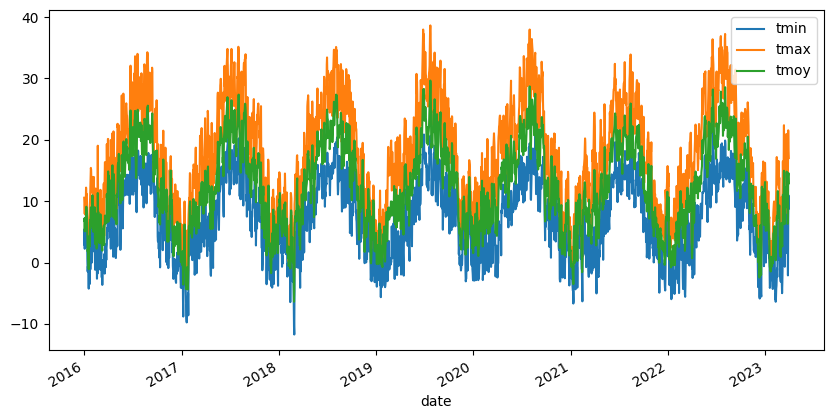

In [9]:
df_aura.plot(figsize=(10,5))
plt.show()

- Sélectionner et visualiser uniquement les **données de l'année 2018** grâce à une sélection sur l'index

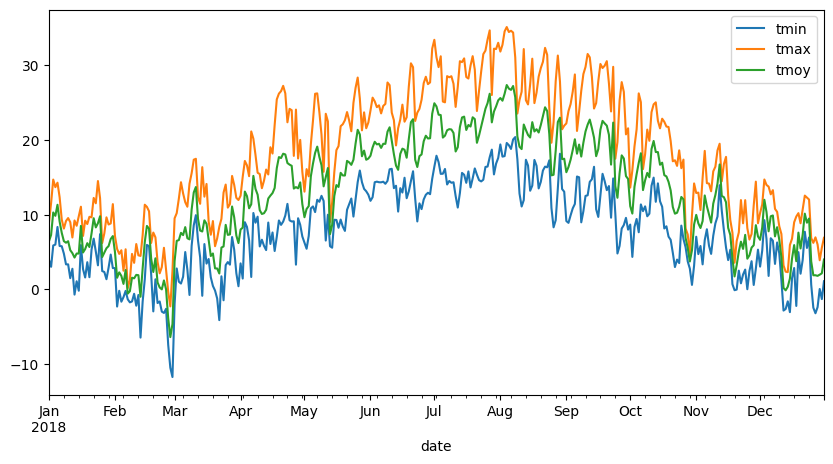

In [10]:
df_aura.loc["2018"].plot(figsize=(10,5))
plt.show()

- Effectuer un **ré-échantillonage jour par jour** (upsampling) sur toutes les données de la région Auvergne-Rhône-Alpes. Utiliser la **meilleure methode d'imputation** parmi "bfill", "ffill" et "interpolate"

In [11]:
df_aura = df_aura.resample("D").ffill()
df_aura

region   tmin   tmax   tmoy
date                                                 
2016-01-01  Auvergne-Rhône-Alpes   2.96  10.56   6.76
2016-01-02  Auvergne-Rhône-Alpes   5.45   8.95   7.20
2016-01-03  Auvergne-Rhône-Alpes   2.24   7.93   5.08
2016-01-04  Auvergne-Rhône-Alpes   4.81   9.53   7.17
2016-01-05  Auvergne-Rhône-Alpes   4.00  10.02   7.01
...                          ...    ...    ...    ...
2023-03-27  Auvergne-Rhône-Alpes   4.62   7.98   6.30
2023-03-28  Auvergne-Rhône-Alpes  -2.10  15.18   6.54
2023-03-29  Auvergne-Rhône-Alpes   6.47  21.55  14.01
2023-03-30  Auvergne-Rhône-Alpes  10.95  18.22  14.58
2023-03-31  Auvergne-Rhône-Alpes   8.80  17.03  12.91

[2647 rows x 4 columns]

## Visualisation des données temporelles

- Sur les données de l'année 2018, effectuer un calcul de **moyennes mobiles à 7 jours et à 30 jours**. Afficher le résultat sur un **graphique**

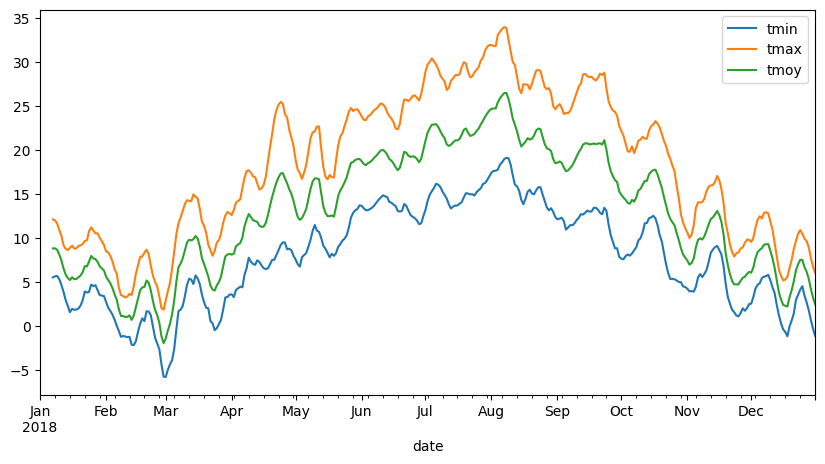

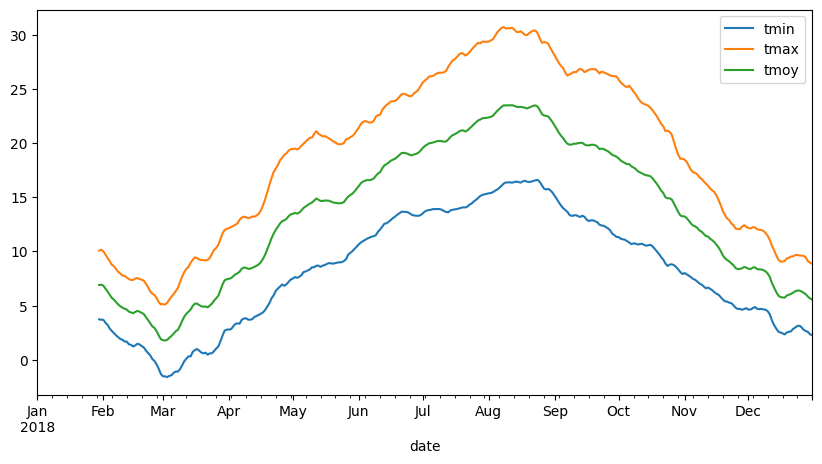

In [14]:
df_aura.loc["2018-01":"2018-12", "tmin":"tmoy"].rolling(window=7).mean().plot(figsize=(10,5))
df_aura.loc["2018-01":"2018-12", "tmin":"tmoy"].rolling(window=30).mean().plot(figsize=(10,5))
plt.show()

## Analyse exploratoire des données

### Analyse de la stationnarité

- A l'aide du test de **Dickey-Fuller (ADF)**, analyser la **stationnarité des données**. Comparer le résultat pour l'**ensemble des années** avec le résultat de l'**année 2018 uniquement**. Expliquer le résultat

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
print("POUR L'ENSEMBLE DES ANNEES")
for col in ["tmin", "tmax", "tmoy"]:
    print(f"Résultat pour la colonne {col}")
    result = adfuller(df_aura.loc[:,col])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    print()

POUR L'ENSEMBLE DES ANNEES
Résultat pour la colonne tmin
Statistiques ADF : -3.6942807695553816
p-value : 0.004194323217396331
Valeurs Critiques :
	1%: -3.43283791013257
	5%: -2.862639169539476
	10%: -2.567355126436672

Résultat pour la colonne tmax
Statistiques ADF : -3.4472847332364593
p-value : 0.0094487523806763
Valeurs Critiques :
	1%: -3.43284075299399
	5%: -2.86264042500329
	10%: -2.567355794852994

Résultat pour la colonne tmoy
Statistiques ADF : -3.48354224366736
p-value : 0.008419961827170641
Valeurs Critiques :
	1%: -3.43283791013257
	5%: -2.862639169539476
	10%: -2.567355126436672



In [17]:
print("POUR 2018")
for col in ["tmin", "tmax", "tmoy"]:
    print(f"Résultat pour la colonne {col}")
    result = adfuller(df_aura.loc["2018-01":"2018-12",col])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))
    print()

POUR 2018
Résultat pour la colonne tmin
Statistiques ADF : -1.2076234659869498
p-value : 0.670307721679061
Valeurs Critiques :
	1%: -3.44911857009962
	5%: -2.8698097654570507
	10%: -2.5711757061225153

Résultat pour la colonne tmax
Statistiques ADF : -1.8415265800432863
p-value : 0.3600483707286224
Valeurs Critiques :
	1%: -3.448645946352023
	5%: -2.869602139060357
	10%: -2.5710650077160495

Résultat pour la colonne tmoy
Statistiques ADF : -1.259721419201799
p-value : 0.6473925733412768
Valeurs Critiques :
	1%: -3.4490114443793214
	5%: -2.8697627072503757
	10%: -2.5711506161673716



### Analyse de l'auto-corrélation

- Grâce à la bibliothèque Statsmodels, afficher le **graphique d'autocorrélation et d'autocorrélation partielle** pour l'ensemble des données et pour l'année 2018

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

POUR L'ENSEMBLE DES ANNEES
Résultat pour la colonne tmin


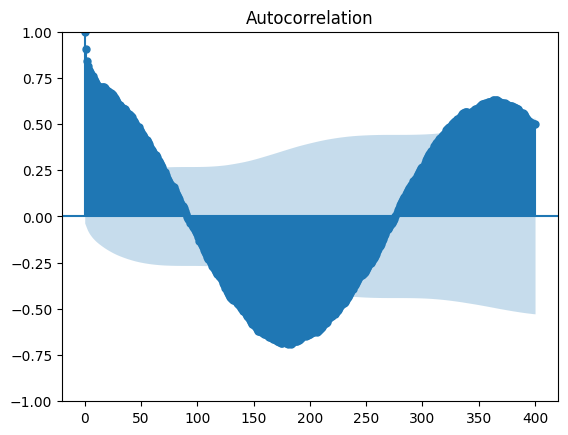

Résultat pour la colonne tmax


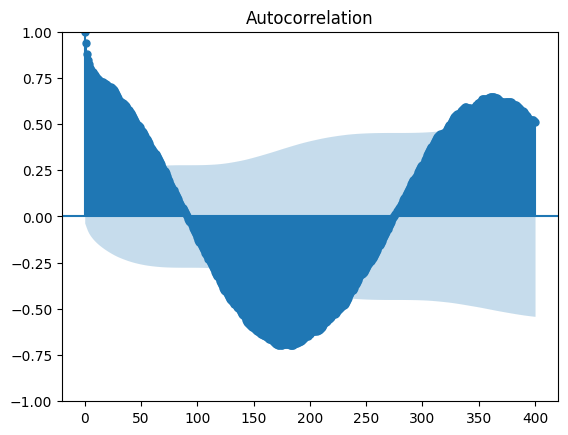

Résultat pour la colonne tmoy


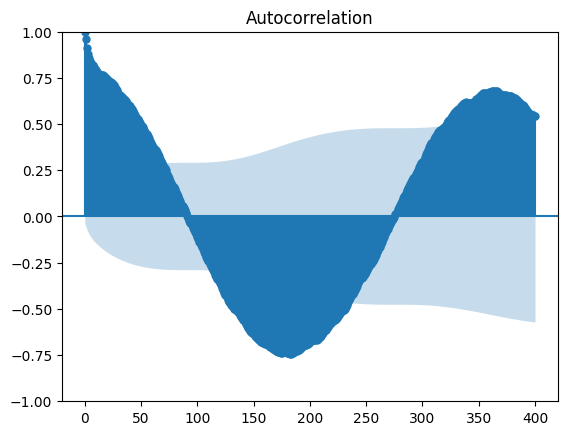

In [19]:
print("POUR L'ENSEMBLE DES ANNEES")
for col in ["tmin", "tmax", "tmoy"]:
    print(f"Résultat pour la colonne {col}")
    plot_acf(df_aura.loc[:,col], lags=400)
    plt.show()

POUR L'ENSEMBLE DES ANNEES
Résultat pour la colonne tmin


D:\__dossier_essais\Semaines_Simplon\Semaine_avril\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


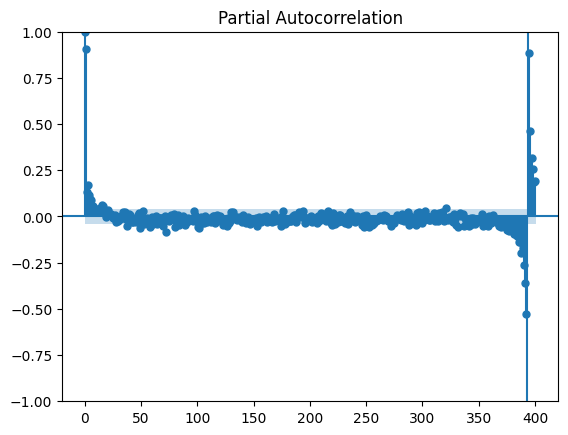

Résultat pour la colonne tmax


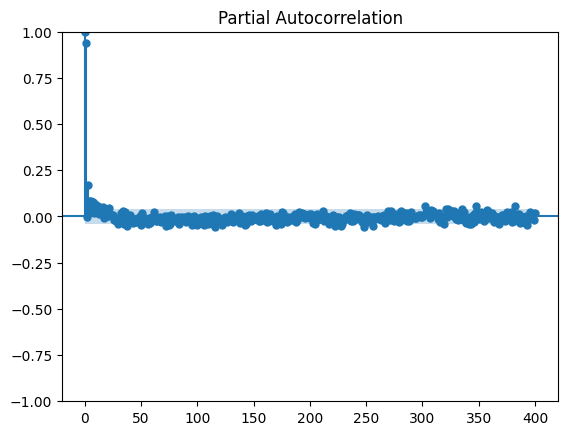

Résultat pour la colonne tmoy


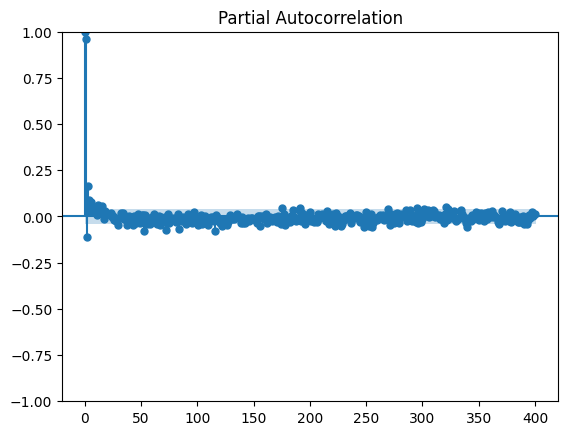

In [20]:
print("POUR L'ENSEMBLE DES ANNEES")
for col in ["tmin", "tmax", "tmoy"]:
    print(f"Résultat pour la colonne {col}")
    plot_pacf(df_aura.loc[:,col], lags=400)
    plt.show()

POUR 2018
Résultat pour la colonne tmin


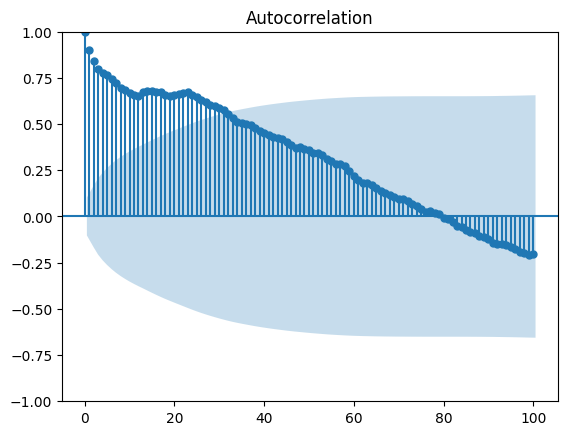

Résultat pour la colonne tmax


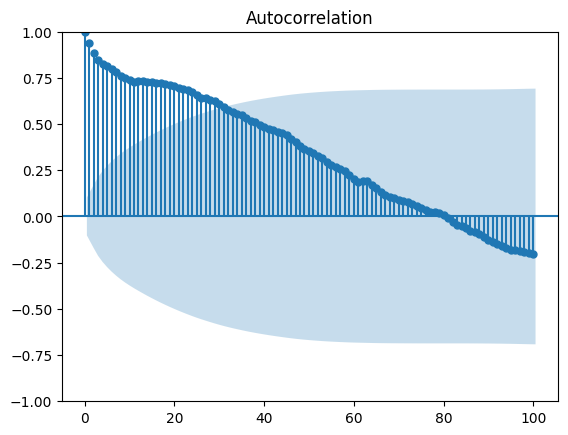

Résultat pour la colonne tmoy


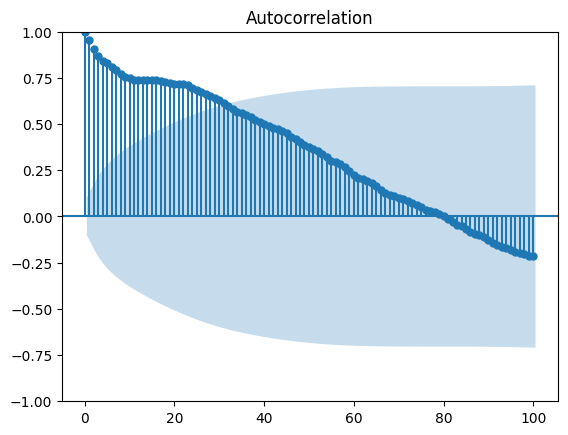

In [21]:
print("POUR 2018")
for col in ["tmin", "tmax", "tmoy"]:
    print(f"Résultat pour la colonne {col}")
    plot_acf(df_aura.loc["2018-01":"2018-12",col], lags=100)
    plt.show()

POUR 2018
Résultat pour la colonne tmin


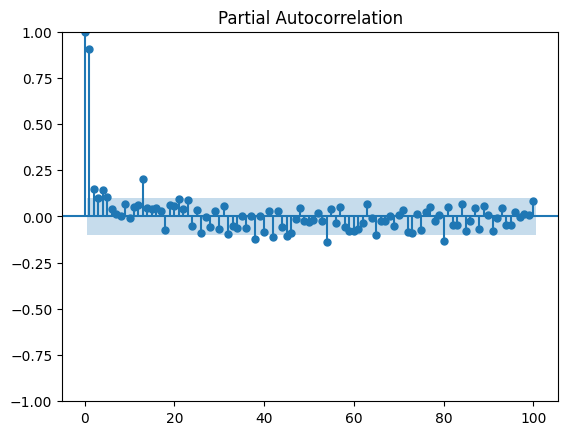

Résultat pour la colonne tmax


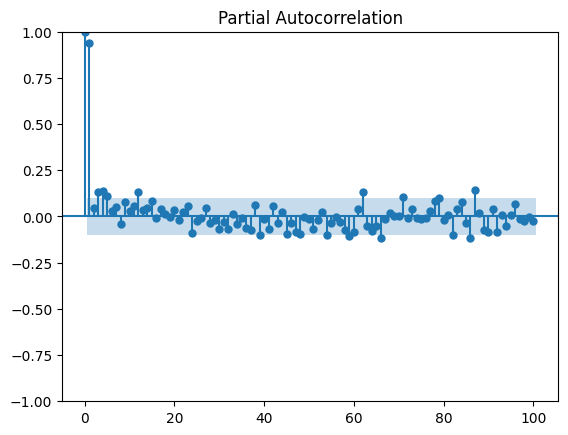

Résultat pour la colonne tmoy


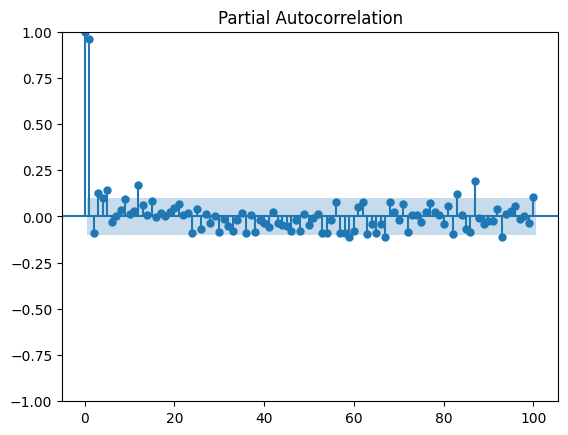

In [22]:
print("POUR 2018")
for col in ["tmin", "tmax", "tmoy"]:
    print(f"Résultat pour la colonne {col}")
    plot_pacf(df_aura.loc["2018-01":"2018-12",col], lags=100)
    plt.show()

- Faire la **même analyse exploratoire des données (EDA)** pour les données des cours des **actions du CAC40**

## 🚀 Pour aller plus loin

- [Interpreting ACF and PACF Plots for Time Series Forecasting](https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c)
- [Série temporelle - Wikipedia](https://fr.wikipedia.org/wiki/S%C3%A9rie_temporelle)